# Python Practice Lecture 15 MATH 342W Queens College - Guide to Data Visualization
## Author: Amir ElTabakh
## Date: March 22, 2022

## Agenda:
* For MA students only: Eigendecomposition in Python and the Projection Matrix
* Your guide to Data Viz in Python

## For MA students only: Eigendecomposition in Python and the Projection Matrix

We will see some major concepts of linear algebra in this chapter. We will start with defining eigenvectors and eigenvalues. We will develop on the idea that a matrix can be seen as a linear transformation and that applying a matrix on its eigenvectors gives new vectors that have the same direction. Then we will see how to express quadratic equations into matrix form. We will see that the eigendecomposition of the matrix corresponding to a quadratic equation can be used to find the minimum and maximum of this function. As a bonus, we will also see how to visualize linear transformations in Python!

### Eigendecomposition

The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix. In the case of eigendecomposition, we decompose the initial matrix into the product of its eigenvectors and eigenvalues. Before all, let’s see the link between matrices and linear transformation. Then, you’ll learn what are eigenvectors and eigenvalues.

### Matrices as linear transformations

You can think of matrices as linear transformations. Some matrices will rotate your space, others will rescale it. When we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we apply the matrix to the vector, it means that we calculate the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# Create 2 x 2 matrix A
A = np.array([[-1, 3], [2, -2]])
A

array([[-1,  3],
       [ 2, -2]])

In [2]:
v = np.array([[2], [1]])
v

array([[2],
       [1]])

First, let’s create a function `plotVectors()` to easily plot vectors and visualize transformations.

In [3]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

(-1.0, 4.0)

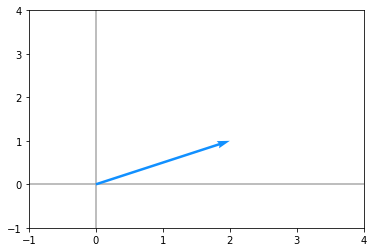

In [4]:
# use the function to plot the vector v
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

Now, let’s apply the matrix $A$ to this vector. We’ll plot the old vector v (light blue) and the new one (orange).

[[1]
 [2]]


(-1.0, 4.0)

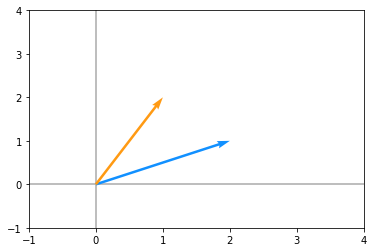

In [5]:
Av = A.dot(v) # matrix multiplication
print(Av)

# plot v vec and Av vec
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

We can see that applying the matrix $A$ has the effect of modifying the vector.

You can think of matrices as linear transformation recipes. Let’s see the case of a very special type of vector: the eigenvectors.

### Eigenvectors and eigenvalues

We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gives us a new vector that has the exact same direction. The scale can be different but the direction is the same. Applying the matrix doesn’t change the direction of the vector. This special vector is called an *eigenvector* of the matrix. We will see that finding the eigenvectors of a matrix can be very useful.

Imagine that the transformation of the initial vector by the matrix gives a new vector with the exact same direction. This vector is called an eigenvector of A.

This means that $v$ is a eigenvector of $A$ if $v$ and $Av$ (the transformed vector) are in the same direction. The output vector is just a scaled version of the input vector. This scaling factor is $\lambda$ which is called the eigenvalue of $A$.

Mathematically, we have the following equation:

$Av=\lambda v$

The vector $Av$ is the vector $v$ transformed by the matrix $A$. This transformed vector is a scaled version (scaled by the value $\lambda$) of the initial vector $v$.

Let's create a new matrix and define it's corresponding eigenvector and see the equation above in action.

In [6]:
A = np.array([[5, 1], [3, 3]])
A

array([[5, 1],
       [3, 3]])

In [7]:
# an eigenvector of A
v = np.array([[1], [1]])
v

array([[1],
       [1]])

(-1.0, 7.0)

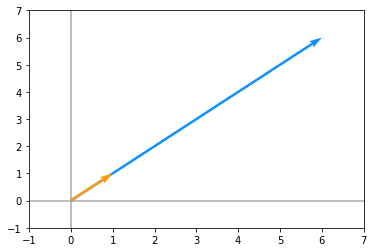

In [8]:
Av = A.dot(v)

orange = '#FF9A13'
blue = '#1190FF'

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)

We can see that their directions are the same! Let's try the same procedure with another eigenvector of $A$.

In [9]:
v = np.array([[1], [-3]])
v

array([[ 1],
       [-3]])

(-1.0, 3.0)

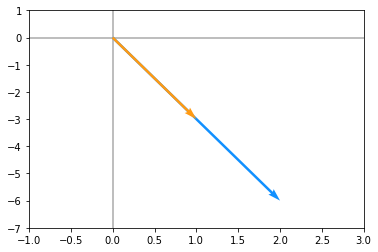

In [10]:
Av = A.dot(v)

plotVectors([Av.flatten(), v.flatten()], cols=[blue, orange])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

This example shows that the eigenvectors $v$ are vectors that change only in scale when we apply the matrix $A$ to them. Here the scales were 6 for the first eigenvector and 2 to the second but $\lambda$ can take any real or even complex value.

### Find eigenvalues and eigenvectors in Python

Numpy provides a function returning eigenvectors and eigenvalues (the first array corresponds to the eigenvalues and the second to the eigenvectors concatenated in columns).

In [11]:
A = np.array([[5, 1], [3, 3]])
A

array([[5, 1],
       [3, 3]])

In [12]:
np.linalg.eig(A)

(array([6., 2.]),
 array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

We can see that the eigenvalues are the same as the ones we used before: 6 and 2.

The eigenvectors correspond to the columns of the second array.

In [13]:
V = np.linalg.eig(A)[1]
V

array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]])

This means that the eigenvector corresponding to $\lambda=6$ is:

In [14]:
v0 = np.linalg.eig(A)[1][:, [0]]
v0

array([[0.70710678],
       [0.70710678]])

The eigenvector corresponding to $\lambda=2$ is:

In [15]:
v1 = np.linalg.eig(A)[1][:, [1]]
v1

array([[-0.31622777],
       [ 0.9486833 ]])

The eigenvectors look different because they have not necessarly the same scaling than the ones we gave in the example. We can easily see that the first corresponds to a scaled version of our [1 1]. But the same property stands. We still have $Av=\lambda v$:

$\left[ {\begin{array}{cc}
    5 & 1 \\
    3 & 3 \\
  \end{array} } \right]
  \left[ {\begin{array}{c}
    0.70710678 \\
    0.70710678 \\
  \end{array} } \right] = \left[ {\begin{array}{c}
    4.24264069 \\
    4.24264069 \\
  \end{array} } \right]$
  
With $0.70710678×6=4.24264069$. So there are an infinite number of eigenvectors corresponding to the eigenvalue 6. They are equivalent because we are interested by their directions.

Great! So now we have our eigenvectors. Lets get the lambdas (eigenvalues) and show that $Av=\lambda v$.

In [16]:
# get lambda
lambdas = np.linalg.eig(A)[0]
lambda_0 = np.linalg.eig(A)[0][0]
lambda_1 = np.linalg.eig(A)[0][1]

print(lambdas)

[6. 2.]


In [17]:
A @ v0

array([[4.24264069],
       [4.24264069]])

In [18]:
lambda_0 * v0

array([[4.24264069],
       [4.24264069]])

And again for the other eigenvalue-eigenvector pair,

In [19]:
A @ v1

array([[-0.63245553],
       [ 1.8973666 ]])

In [20]:
lambda_1 * v1

array([[-0.63245553],
       [ 1.8973666 ]])

### The Projection Matrix

Now that we have an idea of what eigenvectors and eigenvalues are, we can see how it can be used to decompose a matrix. All eigenvectors of a matrix A can be concatenated in a matrix with each column corresponding to each eigenvector (like in the second array return by `np.linalg.eig(A)).`

In [21]:
V = np.linalg.eig(A)[1]
V

array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]])

The first column $v_0$,

$v_0 = \left[ {\begin{array}{c}
    1 \\
    1 \\
  \end{array} } \right]$
  
corresponds to $\lambda = 6$ and,

$v_1 = \left[ {\begin{array}{c}
    1 \\
    -3 \\
  \end{array} } \right]$
  
to $\lambda = 2$. The vector $\lambda$ can be created from all eigenvalues:

$\lambda = \left[ {\begin{array}{c}
    6 \\
    2 \\
  \end{array} } \right]$
  
Then the eigendecomposition is given by,

$A = V \cdot diag(\lambda) \cdot V^{-1}$

A diagonal matrix is that in which the entries on the main diagonal have values different than zero, and the rest of the values in the whole matrix are zeros. I won't be going into the process of diagonalization in detail.

In [22]:
A

array([[5, 1],
       [3, 3]])

In [23]:
V @ np.diag(lambdas) @ np.linalg.inv(V)

array([[5., 1.],
       [3., 3.]])

Let's apply this linear algebra to real data. We'll import the Boston Housing Dataset.

In [24]:
# importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import sklearn's datasets module
from sklearn import datasets

# Load the Boston Housing dataset as bh
bh = datasets.load_boston()

# Initialize target variable
y = bh.target
y

# Create Boston Housing df
df = pd.DataFrame(data = bh.data, columns = bh.feature_names)

# Load the first 5 rows of df
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
# Adding intercept column
df.insert(0, 1, 1)
X = df.copy()
X.head()

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
X

,1,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [28]:
# Convert X to numpy array (matrix)
X = X.to_numpy()
Xt = X.transpose()
XtXinv = np.linalg.inv(Xt @ X)

# Define Hat matrix
H = X @ XtXinv @ Xt
H[0:5, 0:5]

array([[0.01692479, 0.00447191, 0.00378806, 0.00539423, 0.00443206],
       [0.00447191, 0.01110918, 0.00868414, 0.00785356, 0.00867075],
       [0.00378806, 0.00868414, 0.01182295, 0.01127439, 0.01162635],
       [0.00539423, 0.00785356, 0.01127439, 0.01569642, 0.01530022],
       [0.00443206, 0.00867075, 0.01162635, 0.01530022, 0.01610951]])

In [29]:
# Dimensions of H
H.shape

(506, 506)

In [30]:
# get eigen decomposition of H
H_eigen_decomp = np.linalg.eig(H)

# get lambdas
lambdas = H_eigen_decomp[0]
lambdas[0:10]

array([1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
       1.+0.j, 1.+0.j])

In [31]:
# coerce to real numbers
lambdas = np.round(np.real(lambdas), 10)
lambdas[0:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
# rank(H)
np.sum(lambdas)

14.0

In [33]:
# check
np.linalg.matrix_rank(H)

14

In [34]:
np.unique(lambdas)

array([-0.,  1.])

It turns out all eigenvalues of a projection matrix are either 0 or 1. Why is this? It makes sense since:

$\begin{align}
H v_1 &= v_1 \\
H x_{\cdot 1} &= x_{\cdot 1}\\
H x_{\cdot 2} &= x_{\cdot 2}\\
       \vdots\\
H x_{\cdot p} &= x_{\cdot p}
\end{align}$

This is the idempotency property.

All these $p+1$ eigenvalues of H are 1 and there are $p+1$ of them. Further,

In [35]:
np.sum(np.diag(H))

14.000000000000167

The trace (sum of the diagonal entries) is also = p+1 i.e. the rank[X]. This is true since the trace of a matrix is always equal to the sum of the eigenvalues since tr(H) = tr(V^-1 D V) = tr(V^-1 V D) = tr(D) = sum lambda_i which in this case is rank[X].

What are the eigenvectors? Only the first $ncol(X) = 14$ reconstruct the space. Are they the same as the X columns?

In [36]:
# get eigenvectors
V = H_eigen_decomp[1]
V.shape

(506, 506)

In [37]:
# the zeroes act as a place holder
V_X_angles = np.zeros((14, 14))
V_X_angles

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [38]:
for i in range(len(X[0])):
    for j in range(len(X[0])):
        if j > i:
            V_X_angles[i, j] = np.arccos(V[:, i] @ V[:, j] / np.sqrt(np.sum(V[:, i]**2) * np.sum(V[:, i]**2))) * 180 / np.pi
            
V_X_angles = pd.DataFrame(np.round(V_X_angles, 10))
V_X_angles

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,89.934116,83.749597,78.022494,90.694263,106.462503,91.109825,84.984137,86.102518,91.345301,88.921219,90.287643,90.548149,89.736554
1,0.0,0.000000,91.571067,90.443819,87.637250,89.972099,88.799038,87.682829,92.664805,91.505576,88.419036,83.441169,92.896240,84.864712
2,0.0,0.000000,0.000000,84.926222,93.316148,97.468842,91.162401,85.926605,87.425653,91.583326,89.632677,90.288267,90.994199,88.684489
3,0.0,0.000000,0.000000,0.000000,89.864638,90.411013,94.504878,85.228423,82.649108,86.925878,90.665170,93.446982,86.502480,94.061955
4,0.0,0.000000,0.000000,0.000000,0.000000,98.536201,93.061635,83.710609,87.835165,87.923860,89.719593,90.477284,88.850101,92.007931
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,92.568995,89.886331,113.656164,93.756396,90.118430,85.457702,93.688273,83.822458
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.915779,92.616975,88.595777,80.844134,85.998377,85.604641,89.787161
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.568002,95.453648,104.460954,94.036245,100.776473,81.871530
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.368524,95.250478,100.568275,81.774674,96.257839
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.709870,97.329785,69.749420,99.923448


No they are not the same as the X and they don't need to be. They just need to represent the same space i.e. their columns need to span the same 14-dimensional subspace. You can check this by just comparing the orthogonal projection matrix which is unique for each subspace.

---

## Your guide to Data Visualization in Python

We've used multiple data visualization libraries up until now, we'll take this opportunity to go over those you should be familiar with. We'll go over the following libraries:

* Matplotlib
* Seaborn 
* GGplot
* Pandas Profiling

We'll take a dive into each library, practice building different plots in each, and identify the strongsuits and weak points of each.

The big thing on your end is to read documentation, that's the only way to know what different libraries and functions are capable of.

### Matplotlib
Matplotlib is the most basic library for graphic data viz in Python. It includes many graphs we can think of, such as histograms and box plots. However, just because it is basic does not mean that it is not powerful, many of the other data visualization libraries out there are based on it.

**Key Points**
* Some libraries, such as Pandas and Seaborn, serve as "wrappers" for matplotlib. They make it simpler to use a variety of matplotlib's methods by reducing the amount of code you have to write.
* Although matplotlib is great for getting a picture of the details, it isn't very practical for efficiently and simply making publication-quality charts
* Matplotlib is extremely powerful but that power comes with complexity
* Matplotlib has recently been chastised for its standard patterns reminiscent of the 1990's.

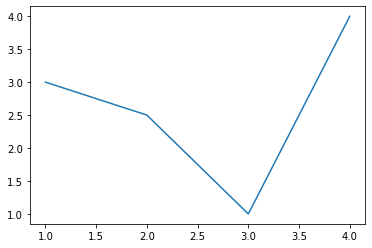

In [39]:
fig, ax = plt.subplots()  # Create a figure containing a single axes
ax.plot([1, 2, 3, 4], [3, 2.5, 1, 4])  # Plot some data on the axes

#### Figure
The whole figure. The Figure keeps track of all the child Axes, a group of Artists, the title, legend, colorbars, etc.

#### Axes
An artist attached to a Figure that contains a region for plotting data.

#### Axis
The objects set the scale and limits and generate ticks and ticklabels. The location of the ticks is determined by a locator object and the ticklabel strings are formatted by a formatter.

#### Artist
Basically, everything visible on the Figure is an Arist including Figure, Axes, and Axis objects. When the Figure is rendered, all of the Artists are drawn to the canvas. 

#### Types of inputs to plotting functions
Plotting functions expect numpy array objects, or objects that can be passed into `numpy.asarray()`. Pandas data objects and numpy matrix objects may not work as intended per the developers, but they work fine with me. Common convention is to convert object to `numpy.array()` objects prior to plotting.

In [40]:
# convert object to array
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

Text(0, 0.5, 'entry b')

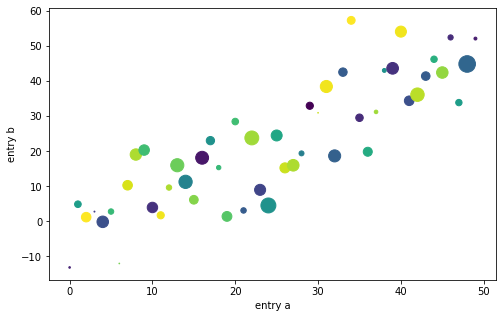

In [41]:
# Generating data
np.random.seed(1738)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(8, 5)) # determine dimensions 
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

#### Coding Styles

There are essentially two ways to use Matplotlib:

* Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

* Rely on pyplot to automatically create and manage the Figures and Axes, and use pyplot functions for plotting.

So one can use the OO-style:

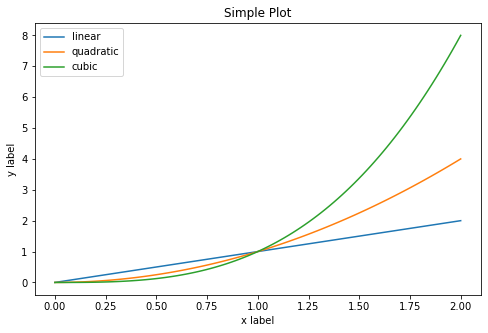

In [42]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

or the pyplot-style:

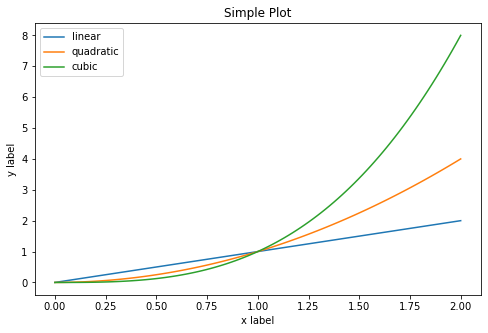

In [43]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(8, 5))
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

#### Helper Functions

Often times you need to make the same plots over and over again with different data sets, or you want to easily wrap Matplotlib methods, use the recommended signature below.

In [44]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use twice to populate two subplots:

In [45]:
# make 4 random data sets
data1, data2, data3, data4 = np.random.randn(4, 100) 

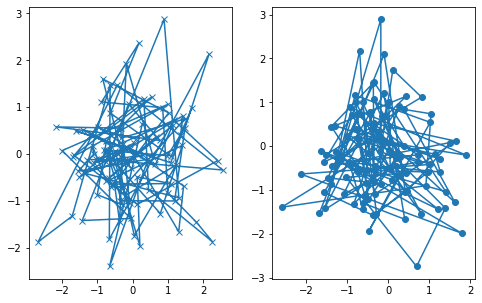

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

#### Styling Options

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the *color*, *linewidth*, and *linestyle* of the Artists created by plot, and we set the linestyle of the second line after the fact with `set_linestyle`.

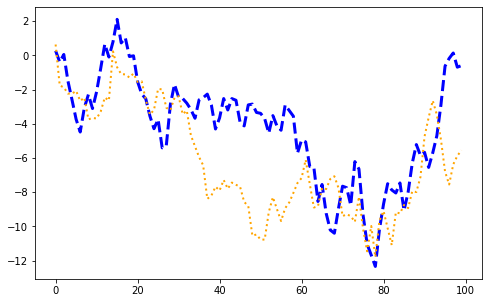

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

#### Colors

Matplotlib has a very flexible array of colors that are accepted for most Artists; see the [colors](https://matplotlib.org/stable/tutorials/colors/colors.html) tutorial for a list of specifications. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:

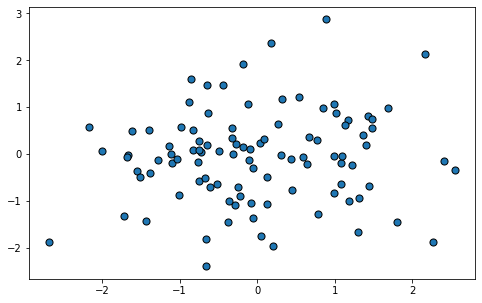

In [48]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

#### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the linestyles example.

Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see [markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)).

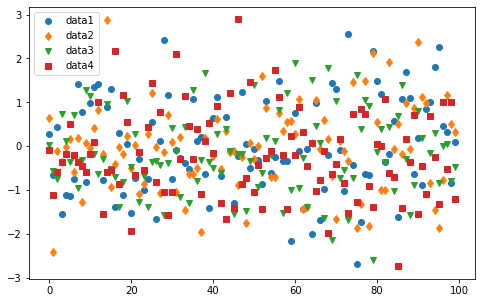

In [49]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

#### Axes labels and text

`set_xlabel`, `set_ylabel`, and `set_title` are used to add text in their respective locations. Text can also be directly added to plots using text:

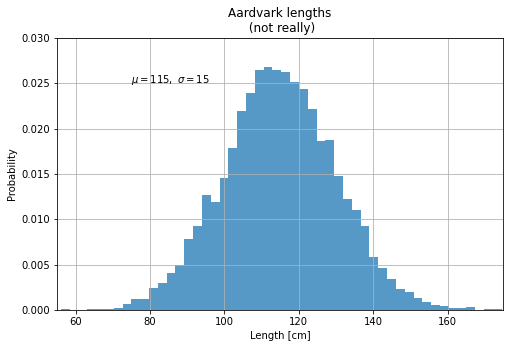

In [50]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(8, 5))

# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

All of the [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text) functions return a matplotlib.text.Text instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:
```
t = ax.set_xlabel('my data', fontsize=14, color='red')
```
These properties are covered in more detail in Text properties and layout.

#### Using mathematical expressions in text
Matplotlib accepts TeX equation expressions in any text expression. For example to write the expression $\sigma_i = 15$ in the title, you can write a TeX expression surrounded by dollar signs:

```
ax.set_title(r'$\sigma_i=15$')
```

where the r preceding the title string signifies that the string is a raw string and not to treat backslashes as python escapes. Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts – for details see Writing mathematical expressions. You can also use LaTeX directly to format your text and incorporate the output directly into your display figures or saved postscript – see Text rendering with LaTeX.

We've gone over the fundamentals of all plots in Python through MatPlotLib. Now to Seaborn.

### Seaborn

Seaborn is a Python library for creating statistical graphics. It has high-level software for creating visually appealing and insightful statistical graphics. Data scientists mostly use matplotlib for education and research, but Seaborn for publications and real-world demonstrations. Seaborn is now the industry-standard Python Data Visualization library. You’ll have to know matplotlib to modify Seaborn’s defaults since it’s built atop of it, which implies that it can go beyond matplotlib while having less complexity and syntax.

The main features of Seaborn are:

1. Seaborn uses matplotlib’s power to construct beautiful charts with only a few code lines. 
2. Its default designs and color palettes, which are built to be more visually attractive and traditional, are the main difference.
3. To plot graphs, it makes use of Matplotlib.
4. Its dataset-oriented plotting mechanisms work with data frames and vectors containing entire datasets, performing the requisite concept mapping and statistical aggregation internally to generate insightful plots.
5. Seaborn is a fully accessible python library that we can download using the pip install function in our Python environment.
6. It aims to make visualization a key component of data exploration and comprehension.

Many people opt for seaborn when it comes to popular plots such as bar plot, box plot, count plot, histograms, etc. not just because they could be created with less code but also they look much prettier. The big con is Seaborn is more constrained and does not have as wide a collection as matplotlib, so you may have to resort to using helper functions.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

We'll be using the [Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams) dataset. I've already downloaded the CSV file onto my Github, we can easily import it here. This is a fictional dataset and should only be used for data science training purposes.

In [51]:
# pip install seaborn in case you haven't already
#!pip install seaborn

In [52]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(10, 6)}) #width=10, #height=6

# URL for Student Performance Data
url = "https://raw.githubusercontent.com/sfnxboy/342-2022-Python-Practice-lectures/main/Datasets/StudentsPerformance_PracticeData.csv"

# Import data
student_df = pd.read_csv(url)

# Snapshot
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the `scatterplot()` function.

There are two ways you can do so.

The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, `x=` and `y=`.

The second way is to directly pass in Series of data to the axes arguments.

<AxesSubplot:xlabel='math score', ylabel='reading score'>

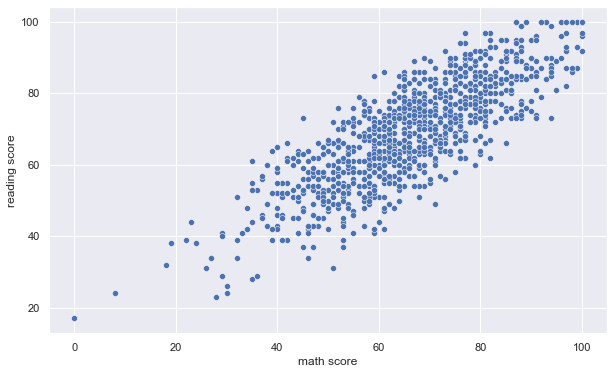

In [53]:
# Recommended way
sns.scatterplot(data = student_df,
            x = 'math score',
            y = 'reading score')

# Alternative way
# sns.scatter(x = student_df['math score'],
#             y = student_df['reading score'])

#### Informative distributional summaries
Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

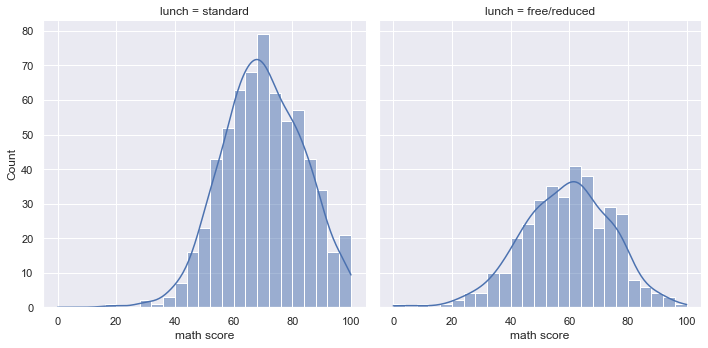

In [54]:
# line and scatter plot
sns.displot(data = student_df,
            x = 'math score',
            col = 'lunch',
            kde = True)

To draw a bivariate plot, assign both x and y:

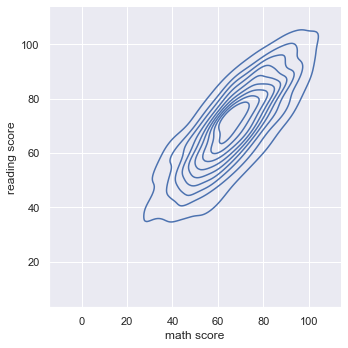

In [55]:
# bivariate plot
sns.displot(data = student_df,
            x = 'math score',
            y = 'reading score',
            kind = 'kde')

You can plot the scatter plot with the bivariate distribution plot.

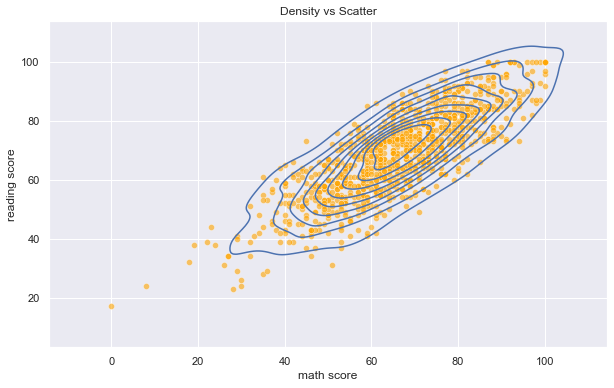

In [56]:
# scatter plot
sns.scatterplot(data = student_df,
            x = 'math score',
            y = 'reading score',
            color = 'orange',
            alpha = 0.6)

# bivariate plot
sns.kdeplot(data = student_df,
            x = 'math score',
            y = 'reading score',
            kind = 'kde')

plt.title('Density vs Scatter');

In [57]:
# dont forget to use the help function to conveniently read documentation
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(x=None, *, y=None, shade=None, vertical=False, kernel=None, bw=None, gridsize=200, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=None, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, weights=None, hue=None, palette=None, hue_order=None, hue_norm=None, multiple='layer', common_norm=True, common_grid=False, levels=10, thresh=0.05, bw_method='scott', bw_adjust=1, log_scale=None, color=None, fill=None, data=None, data2=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analagous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can produce a plot that

#### Specialized plots for categorical data

Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through `catplot()`. These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a “swarm” plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap:

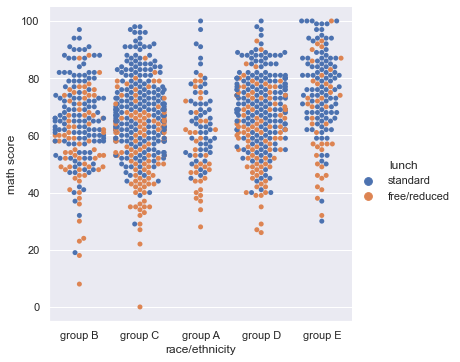

In [58]:
# categorical swarm plot
sns.catplot(data = student_df,
            kind = 'swarm',
            x = 'race/ethnicity',
            y = 'math score',
            hue = 'lunch')

Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from:

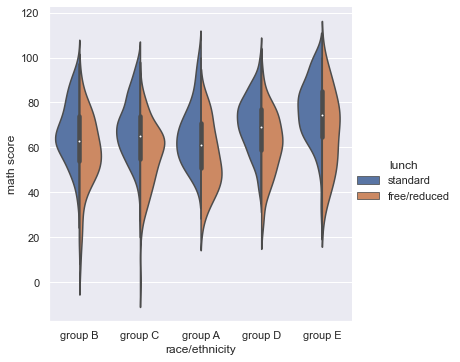

In [59]:
# categorical violin plot
sns.catplot(data = student_df,
            kind = 'violin',
            x = 'race/ethnicity',
            y = 'math score',
            hue = 'lunch',
            split = True)

Or you could show only the mean value and its confidence interval within each nested category:

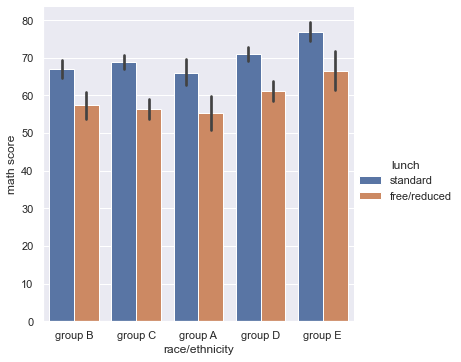

In [60]:
# categorical bar plot
sns.catplot(data = student_df,
            kind = 'bar',
            x = 'race/ethnicity',
            y = 'math score',
            hue = 'lunch')

#### Composite views onto multivariate datasets
Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, `jointplot()`, focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

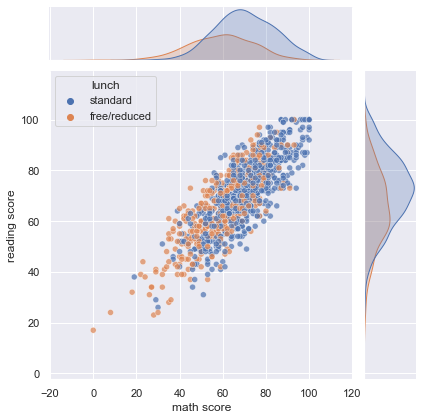

In [61]:
# joint plot
sns.jointplot(data = student_df,
              x = 'math score',
              y = 'reading score',
              hue = 'lunch',
              alpha = 0.7)

The other, pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

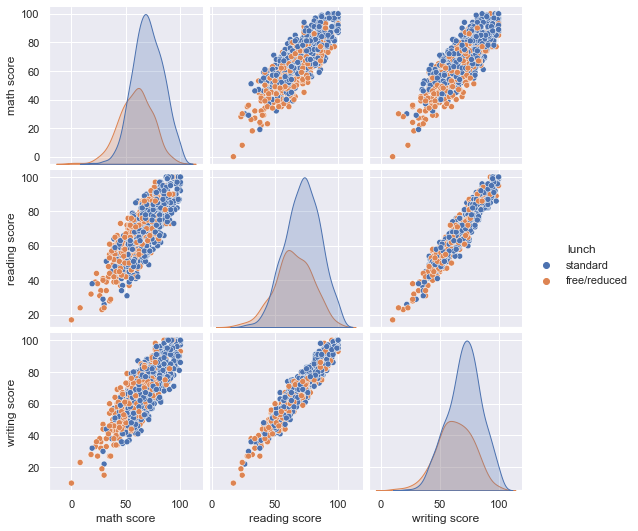

In [62]:
# pair plot
sns.pairplot(data = student_df,
            hue = 'lunch')

### gplot (aka plotnine)

For this exercise we are going to use plotnine which is a Python implementation of the The Grammar of Graphics, inspired by the interface of the ggplot2 package from R. plotnine (and it's R cousin ggplot2) is a very nice way to create publication quality plots.

In [63]:
!pip install pandas plotnine

In [64]:
from plotnine.data import mpg

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


These two lines of code import and show the dataset. This table of data is also a data visualization! After specifiying the data you want to visualize, the next step is to define the variables you want to use for each axis in your plot. A DataFrame can contain many fields, so you have to tell plotnine which of the variables to use in the graphic.

Aesthetics maps data variables to graphical attributes, like 2D position and color. For example, the following code creates a graphic that shows vehicle classes on the x-axis and highway fuel consumption on the y-axis:

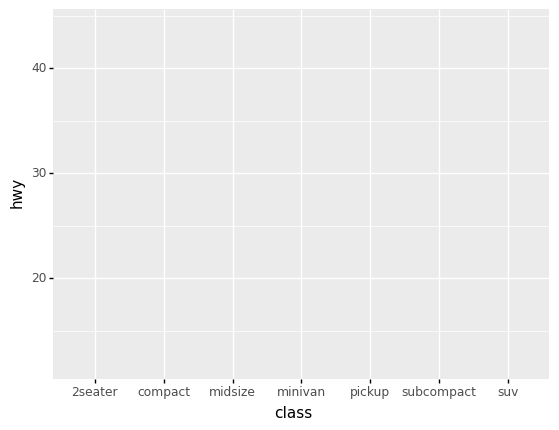

<ggplot: (78045970517)>

In [65]:
from plotnine import ggplot, aes

ggplot(mpg) + aes(x="class", y="hwy")

Using the ggplot object from the previous section as the base for the visualization, the code maps the vehicle class attribute to the horizontal graphical axis and the hwy fuel economy to the vertical axis. But the generated plot is still blank because it’s missing the geometric object for representing each data element.

#### Geometric Objects: Choose Different Plot Types
After defining your data and the attributes that you want to use in the graphic, you need to specify a geometric object to tell plotnine how data points should be drawn.

plotnine provides a lot of geometric objects that you can use out of the box, like lines, points, bars, polygons, and a lot more. A list of all available geometric objects is available in plotnine’s geoms API Reference.

The following code illustrates how to use the point geometric object to plot data:

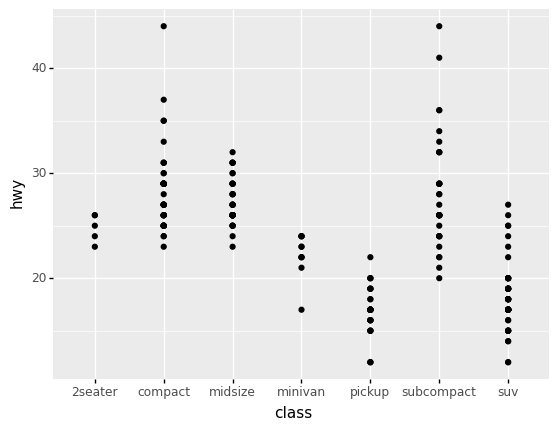

<ggplot: (78045996927)>

In [66]:
from plotnine import ggplot, aes, geom_point

ggplot(mpg) + aes(x="class", y="hwy") + geom_point()

As you can see, the generated data visualization has a point for each vehicle in the dataset. The axes show the vehicle class and the highway fuel economy.

There are many other geometric objects that you can use to visualize the same dataset. For example, the following code uses the bar geometric object to show the count of vehicles for each class:



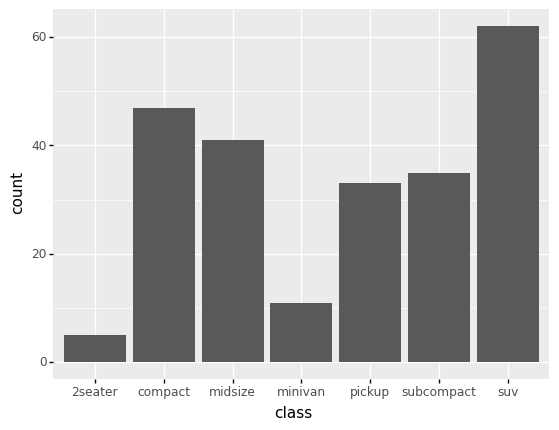

<ggplot: (78046046724)>

In [67]:
from plotnine import ggplot, aes, geom_bar

ggplot(mpg) + aes(x="class") + geom_bar()

The height of each bar in the plot represents the number of vehicles belonging to the corresponding vehicle class. You’ll learn more about data aggregation and grouping the latter sections.

So far we've gone over about the three compulsory components that must be specified when creating data visualizations:

1. Data
2. Aesthetics
3. Geometric objects

You also learned how to combine them using the + operator. Now you’ll learn about some optional components that you can use to create more complex and beautiful graphics.

#### Using Additional Python and ggplot Features to Enhance Data Visualizations

In this section, you’re going to learn about the optional components that you can use when building data visualizations with plotnine. These components can be grouped into five categories:

1. Statistical transformations
2. Scales
3. Coordinates systems
4. Facets
5. Themes

You can use them to create richer and more beautiful plots.

#### Statistical Transformations: Aggregate and Transform Your Data

Statistical transformations apply some computation to the data before plotting it, for example to display some statistical indicator instead of the raw data. plotnine includes several statistical transformations that you can use.

Let’s say that you want to create a histogram to display the distributions of the levels of [Lake Huron](https://en.wikipedia.org/wiki/Lake_Huron) from 1875 to 1975. This dataset is included with plotnine. You can use the following code to inspect the dataset from Jupyter Notebook and learn about its format:



In [68]:
# Import our example dataset with the levels of Lake Huron 1875–1975
from plotnine.data import huron

huron

,year,level,decade
0,1875,580.38,1870
1,1876,581.86,1870
2,1877,580.97,1870
3,1878,580.80,1870
4,1879,579.79,1870
...,...,...,...
93,1968,578.52,1960
94,1969,579.74,1960
95,1970,579.31,1970
96,1971,579.89,1970


As you can see, the dataset contains three columns:

1. year
2. level
3. decade

Now you can build the histogram in two steps:

1. Group the level measurements into bins.
2. Display the number of measurements in each bin using a bar plot.

The following code shows how these steps can be done in plotnine:

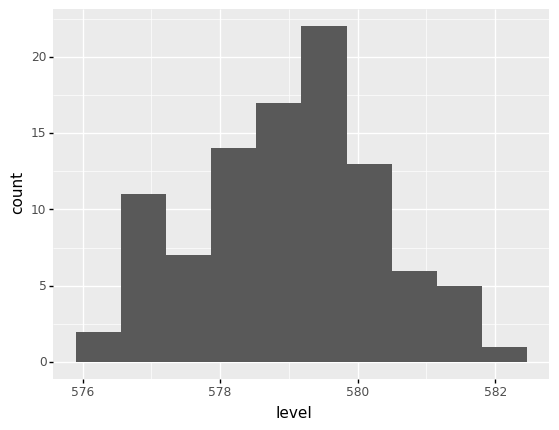

<ggplot: (78046010772)>

In [69]:
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(huron) + aes(x="level") + stat_bin(bins=10) + geom_bar()

This plot shows the number of measurements for each range of lake levels. As you can see, most of the time the level was between 578 and 580.

For most common tasks, like building histograms, plotnine includes very convenient functions that make the code more concise. For example, with geom_histogram(), you can build the above histogram like this:



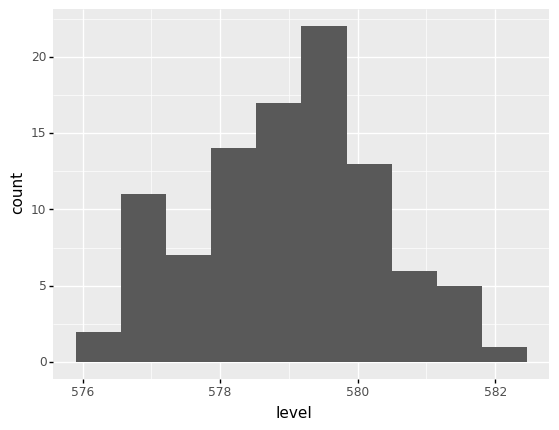

<ggplot: (78046046760)>

In [70]:
from plotnine import ggplot, aes, geom_histogram

ggplot(huron) + aes(x="level") + geom_histogram(bins=10)

Using `geom_histogram()` is the same as using `stats_bin()` and then `geom_bar()`. Running this code generates the same graphic you saw above.

Now let’s look at another example of a statistical transformation. A box plot is a very popular statistical tool used to show the minimum, maximum, sample median, first and third quartiles, and outliers from a dataset.

Suppose you want to build a visualization based on the same dataset to show a box plot for each decade’s level measurements. You can build this plot in two steps:

1. Group the measurements by decade.
2. Create a box plot for each group.

You can do the first step using factor() in the aesthetics specification. factor() groups together all data points that share the same value for the specified attribute.

Then, once you’ve grouped the data by decade, you can draw a box plot for each group using geom_boxplot().

The following code creates a plot using the steps described above:

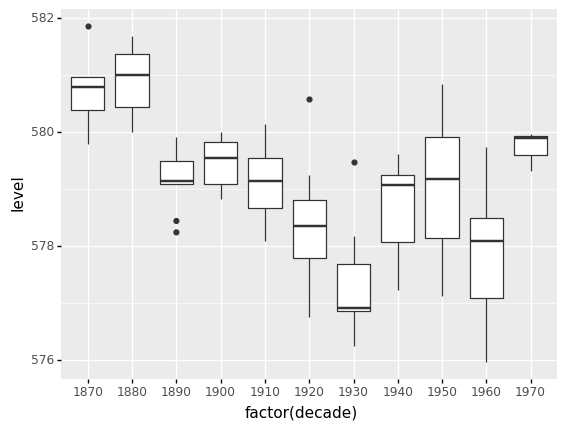

<ggplot: (78045986949)>

In [71]:
from plotnine import ggplot, aes, geom_boxplot

(
  ggplot(huron)
  + aes(x="factor(decade)", y="level")
  + geom_boxplot()
)

The graphic shows the distributions of the water levels using a box plot for each decade.

There are other statistical transformations that you can use to build data visualizations using ggplot in Python. You can learn about them in [plotnine’s stats API documentation](https://plotnine.readthedocs.io/en/stable/api.html#stats).

Scales: Change Data Scale According to Its Meaning
Scales are another kind of transformation that you can apply during the mapping from data to aesthetics. They can help make your visualizations easier to understand.

In [72]:
from plotnine.data import economics

economics

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12122.0,320201,5.0,12.6,8688
570,2015-01-01,12080.8,320367,5.5,13.4,8979
571,2015-02-01,12095.9,320534,5.7,13.1,8705
572,2015-03-01,12161.5,320707,5.2,12.2,8575


As you can see, the dataset includes economics information for each month between the years 1967 and 2015. Each row has the following fields:

* date: The month when the data was collected
* pce: Personal consumption expenditures (in billions of dollars)
* pop: The total population (in thousands)
* psavert: The personal savings rate
* uempmed: The median duration of unemployment (in weeks)
* unemploy: The number of unemployed (in thousands)

Now, using plotnine, you can create a plot to show the evolution of the population through the years:

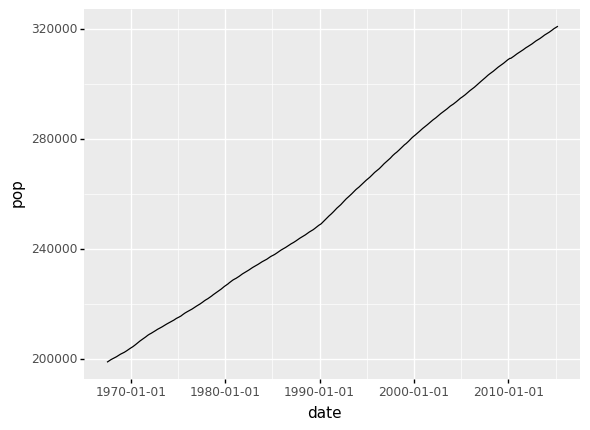

<ggplot: (78046046811)>

In [73]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line

(
    ggplot(economics)  # What data to use
    + aes(x="date", y="pop")  # What variable to use
    + geom_line()  # Geometric object to use for drawing
)

This short code example creates a plot from the economics dataset. Here’s a quick breakdown:

**Line 1:** You import the economics dataset.

**Line 2:** You import the ggplot() class as well as some useful functions from plotnine, aes() and geom_line().

**Line 5:** You create a plot object using ggplot(), passing the economics DataFrame to the constructor.

**Line 6:** You add aes() to set the variable to use for each axis, in this case date and pop.

**Line 7:** You add geom_line() to specify that the chart should be drawn as a line graph.

We just generated a plot that showed the population for each year since 1970. The following code shows how you can use scales to show the elapsed years since 1970 instead of raw dates:

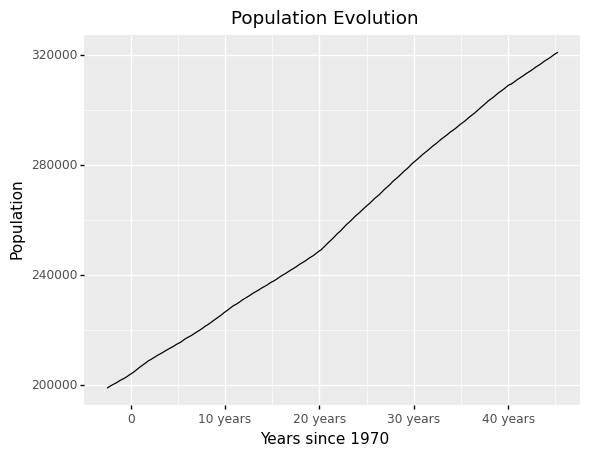

<ggplot: (78046228812)>

In [74]:
from plotnine import ggplot, aes, scale_x_timedelta, labs, geom_line

(
    ggplot(economics)
    + aes(x="date", y="pop")
    + scale_x_timedelta(name="Years since 1970")
    + labs(title="Population Evolution", y="Population")
    + geom_line()
)

Using `scale_x_timedelta()` transforms each point’s x-value by computing its difference from the oldest date in the dataset. Note that the code also uses labs() to set a more descriptive label to the y-axis and the title.

Without changing the data, you’ve made the visualization easier to understand and friendlier to the reader. As you can see, the plot now has better descriptions, and the x-axis shows the elapsed years since 1970 instead of dates.

plotnine provides a large number of scale transformations for you to choose from, including logarithmic and other non-linear scales. You can learn about them in [plotnine’s scales API reference](https://plotnine.readthedocs.io/en/stable/api.html#scales).

#### Coordinates Systems: Map Data Values to 2D Space
A coordinates system defines how data points are mapped to 2D graphical locations in the plot. You can think of it as a map from mathematical variables to graphical positions. Choosing the right coordinates system can improve the readability of your data visualizations.

Let’s revisit the previous example of the bar plot to count vehicles belonging to different classes. You created the plot using the following code:

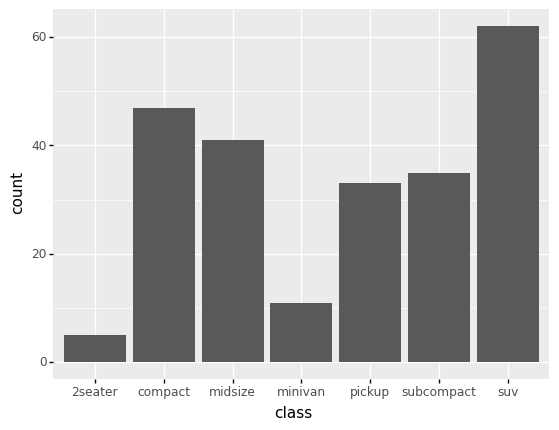

<ggplot: (78046412457)>

In [75]:
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_bar

ggplot(mpg) + aes(x="class") + geom_bar()

The code uses geom_bar() to draw a bar for each vehicle class. Since no particular coordinates system is set, the default one is used.

The height of each bar in the plot represents the number of vehicles in a class.

While there’s nothing wrong with the above graphic, the same information could be better visualized by flipping the axes to display horizontal bars instead of vertical ones.

plotnine provides several functions that allow you to modify the coordinates system. You can flip the axes using `coord_flip()`:

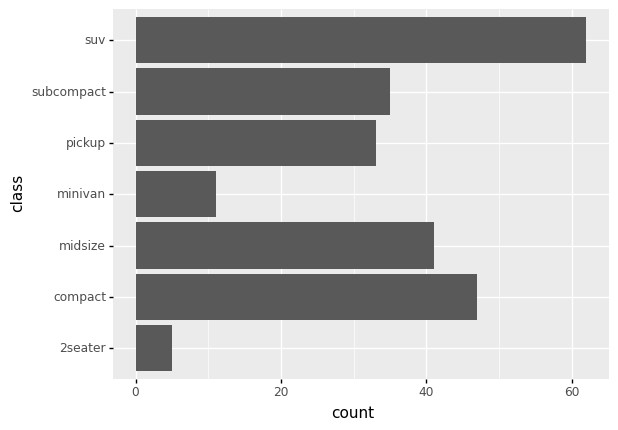

<ggplot: (78046519537)>

In [76]:
from plotnine import ggplot, aes, geom_bar, coord_flip

ggplot(mpg) + aes(x="class") + geom_bar() + coord_flip()

The code flips the x- and y-axes using `coord_flip()`. This graphic shows the same information you saw in the previous plot, but by flipping the axes you may find it easier to understand and compare different bars.

There’s no hard rule about which coordinate system is better. You should pick the one that best suits your problem and data. Give them a try and do some experiments to learn what works for each case. You can find more information about other coordinates systems in [plotnine’s coordinates API reference](https://plotnine.readthedocs.io/en/stable/api.html#coordinates).

#### Facets: Plot Subsets of Data Into Panels in the Same Plot

In this section, you’re going to learn about facets, one of the coolest features of plotnine. Facets allow you to group data by some attributes and then plot each group individually, but in the same image. This is particularly useful when you want to show more than two variables in the same graphic.

For example, let’s say you want to take the fuel economy dataset (mpg) and build a plot showing the miles per gallon for each engine size (displacement) for each vehicle class for each year. In this case your plot needs to display information from four variables:

* hwy: Miles per gallon
* displ: Engine size
* class: Vehicle class
* year: Model year

This presents a challenge, because you have more variables than graphical dimensions. You could use a 3D perspective if you had to display three variables, but a four-dimensional graphic is [hard to even imagine](https://en.wikipedia.org/wiki/Four-dimensional_space).

There’s a two-step trick that you can use when faced with this problem:

1. Start by partitioning the data into groups where all data points in a group share the same values for some attributes.

2. Plot each group individually, showing only the attributes not used in the grouping.

Going back to the example, you can group vehicles by class and year and then plot each group to show displacement and miles per gallon. The following visualization was generated using this technique:

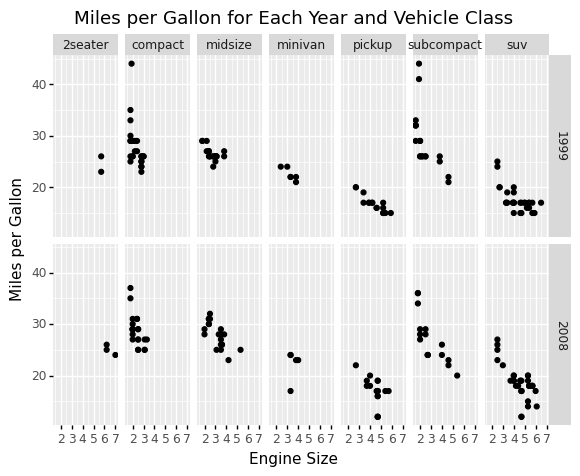

<ggplot: (78046482610)>

In [77]:
from plotnine.data import mpg
from plotnine import ggplot, aes, facet_grid, labs, geom_point

(
    ggplot(mpg)
    + facet_grid(facets="year~class")
    + aes(x="displ", y="hwy")
    + labs(
        x="Engine Size",
        y="Miles per Gallon",
        title="Miles per Gallon for Each Year and Vehicle Class",
    )
    + geom_point()
)

As you can see in the above graphic, there’s a panel for each group. Each panel shows the miles per gallon for different engine displacements belonging to that vehicle class and year.

The code partitions data by year and vehicle class using facet_grid(), passing it the attributes to use for the partitioning with facets="year~class". For each data partition, the plot is built using the components that you saw in previous sections, like aesthetics, geometric objects, and `labs()`.

`facet_grid()` displays the partitions in a grid, using one attribute for rows and the other for columns. plotnine provides other faceting methods that you can use to partition your data using more than two attributes. You can learn more about them in [plotnine’s facets API Reference](https://plotnine.readthedocs.io/en/stable/api.html#facets).

#### Themes: Improve the Look of Your Visualization
Another great way to improve the presentation of your data visualizations is to choose a non-default theme to make your plots stand out, making them more beautiful and vibrant.

plotnine includes several themes that you can pick from. The following code generates the same graphic that you saw in the previous section, but using the FiveThirtyEight theme:

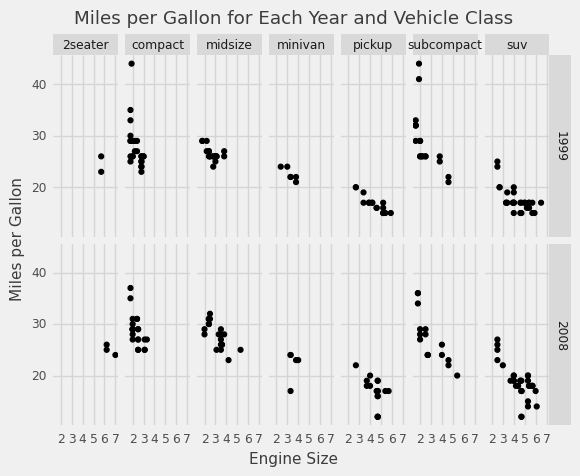

<ggplot: (78046940401)>

In [78]:
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_538

(
    ggplot(mpg)
    + facet_grid(facets="year~class")
    + aes(x="displ", y="hwy")
    + labs(
        x="Engine Size",
        y="Miles per Gallon",
        title="Miles per Gallon for Each Year and Vehicle Class",
    )
    + geom_point()
    + theme_538()
)

As you can see in the image, setting the theme affects the colors, fonts, and shapes styles.

`theme_xkcd()` is another theme that’s worth mentioning because it gives you a really cool comic-like look. It makes your data visualizations look like [xkcd comics](https://xkcd.com/):

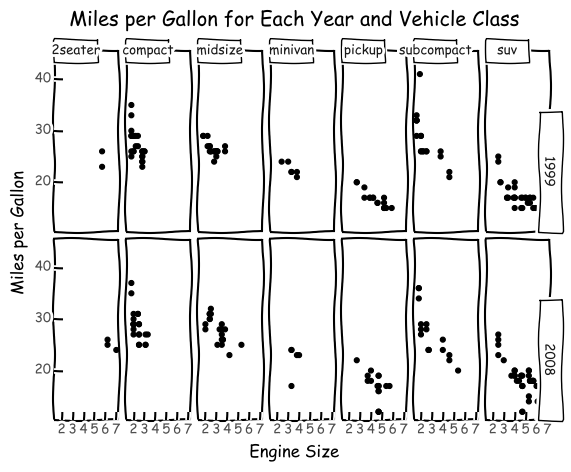

<ggplot: (78047431873)>

In [79]:
from plotnine import ggplot, aes, facet_grid, labs, geom_point, theme_xkcd

(
    ggplot(mpg)
    + facet_grid(facets="year~class")
    + aes(x="displ", y="hwy")
    + labs(
        x="Engine Size",
        y="Miles per Gallon",
        title="Miles per Gallon for Each Year and Vehicle Class",
    )
    + geom_point()
    + theme_xkcd()
)

Choosing the right theme can help you attract and retain the attention of your audience. You can see a list of available themes in plotnine’s themes API reference.

In the preceding sections, you’ve learned about the most important aspects of grammars of graphics and how to use plotnine to build data visualizations. Using ggplot in Python allows you to build visualizations incrementally, first focusing on your data and then adding and tuning components to improve its graphical representation.

In the next section, you’ll learn how to use colors and how to export your visualizations.

#### Visualizing Multidimensional Data
As you saw in the section about facets, displaying data with more than two variables presents some challenges. In this section, you’ll learn how to display three variables at the same time, using colors to represent values.

For example, going back to the fuel economy dataset (mpg), suppose you want to visualize the relationship between the engine cylinder count and the fuel efficiency, but you also want to include the information about vehicle classes in the same plot.

As an alternative to faceting, you can use colors to represent the value of the third variable. To achieve this, you have to map the engine cylinder count to the x-axis and miles per gallon to the y-axis, then use different colors to represent the vehicle classes.

The following code creates the described data visualization:

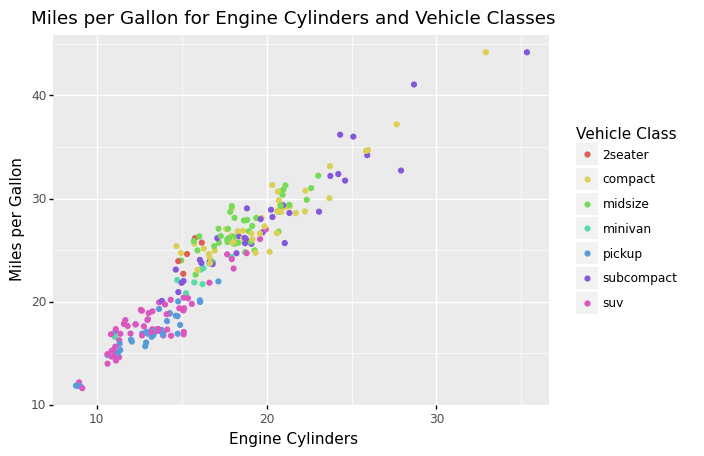

<ggplot: (78047818039)>

In [80]:
from plotnine import ggplot, aes, labs, geom_jitter

(
    ggplot(mpg)
    + aes(x="cty", y="hwy", color="class")
    + labs(
        x="Engine Cylinders",
        y="Miles per Gallon",
        color="Vehicle Class",
        title="Miles per Gallon for Engine Cylinders and Vehicle Classes",
    )
    + geom_jitter() # adds jitter to geom_point()
)

As you can see, the points have different colors depending on the class to which the vehicle belongs.

In this section, you learned another way to display more than two variables in a graphic using ggplot in Python. When you have three variables, you should choose between using facets and colors depending on which approach makes the data visualization easier to understand.

Using ggplot in Python allows you to build data visualizations in a very concise and consistent way. As you’ve seen, even complex and beautiful plots can be made with a few lines of code using plotnine.

Finally, take a look at [plotnine’s documentation](https://plotnine.readthedocs.io/en/stable/index.html#) to continue your journey through ggplot in Python, and also visit [plotnine’s gallery](https://plotnine.readthedocs.io/en/stable/gallery.html) for more ideas and inspiration.

### Pandas Profiling

Being a data scientist in today's age is an incredibly exciting and rewarding career. With the explosion of technology and the immense amount of data and content created daily, data scientist continually need to be learning new ways of efficiently analysing this data. One of the most crucial parts of any new data project is the exploratory data analysis phase. As a data scientist, this phase allows you to learn and familiarize yourself with that data at hand, where the data is collected from, any gaps in the data, any potential outliers and the range of data types used. One tool that has become a staple among data scientist is Pandas Profiling. Pandas Profiling is an open-source tool written in Python that has the ability to generate interactive HTML reports which detail the types of data within the dataset; Highlights missing values; Provides descriptive statistics including mean, standard deviation and skewness; Creates histograms and returns any potential correlations.


In [81]:
# pip install pandas profiling
!pip install pandas_profiling

In [82]:
# importing dependencies
import pandas as pd
import pandas_profiling
from plotnine.data import economics # sample data

profile = pandas_profiling.ProfileReport(df = economics)
profile.to_file('pandas_profile_test.html')

After executing the script a new HTML file called `pandas_profile_text.html` will be created in your project root directory.


#### Overview

The Overview section, the first section within the Pandas Profiling Report, shows summarised statistics for the dataset as a whole. It returns the number of variables, which is the number of columns that were included in the passed DataFrame. The number of observations is the number of rows that were received. The Overview also provides the number of missing cells or duplicate rows and a percentage of total records that were impacted. The missing cells and duplicate row statistics are quite important as a data scientist as these may indicate broader data quality issues or issues with the code used to extract the data. The overview section also includes data around the size of the dataset in memory, the average record size in memory and any data types that are recognised.

Under the Warnings tab within the Overview section, you can find collated warnings for any of the variables within the dataset. In this example, we received a high cardinality warning for name, email and city. Within this context, the high cardinality means that the columns that were flagged contain a very high number of distinct values, you would expect this for employee number and email in the real world.

#### Variables — Categorial

The Variables section within the Pandas Profiling report analyses the columns within the passed DataFrame. A categorical variable is a column that contains data that represents a Python string type.

A typical metric returned for categorical variables is the length of the strings within the column. To view the generated histogram select `Toggle Details` then navigate to the `Length` tab. The length tab also contains statistics regarding the maximum, median, mean and minimum values of the string length.

#### Variables — Numerical

Pandas Profiling offers an incredibly in-depth analysis of numerical variables covering quantile and descriptive statistics. It returns the minimum and maximum values within the dataset and the range between. It displays quartile values which measure the distribution of the ordered values in the dataset above and below the median by dividing the set into four bins. When considering the quartile values, if there is a greater distance between quartile one and the median verse the median and quartile three then we interpret this as meaning a greater scatter of smaller values than the larger values. The interquartile range is simply the results of quartile three minus quartile one.

Standard deviation reflects the distributions of the dataset with regards to its mean value. A low standard deviation implies that the values in the data set are closer to the mean, whereas a higher standard deviation value implies that the dataset values are spread over a greater range. The coefficient of variation, also known as relative standard deviation, is the ratio of the standard deviation to the mean. Kurtosis can be used to describe the shape of the data by measuring the values within the tails of the distribution relative to the mean of the ordered dataset. The Kurtosis value varies depending on the distribution of the data and the presence of extreme outliers. The median absolute deviation is another statistical measure that reflects the distribution of the data around the median and is a more robust measure of the spread when an extreme outlier is present. Skewness reflects the level of distortion from a standard bell-shaped probability distribution. Positive skewness is considered skewness to the right and has a longer tail to the right of the distribution and a negative to the left.

#### Interaction and Correlations

The Interaction and Correlations sections are where Pandas Profiling really sets itself ahead of other exploratory tools. It analyses all the variables as pairs and highlights any highly correlating variables using Pearson, Spearman, Kendal and Phik measures. It provides a powerful easy to understand visual representation of any data that correlations strongly together. As a data scientist, this is a great starting point for questions as to why these data pairs may correlate.


#### Missing Values

The Missing Values section builds on the missing cells metric from the Overview section. It visually represents where the missing values are occurring against all the columns within the DataFrame. This section may highlight data quality issues and may require missing data to be mapped to a default value which we will cover in a later article.

#### Sample Section

The sample section displays a snapshot of results from the head and tail of the dataset. If the dataset is ordered on a particular column you can use this section to gain an understanding of what type of records the minimum and maximum column values are associated with.

#### Summary

Pandas Profiling is an incredible open-source tool that every data scientist should consider adding to their toolbox for the data exploration phase in any project. It is an efficient way to digest and analyse an unfamiliar dataset by providing in-depth descriptive statistics, visual distribution graphs and a powerful set of correlation tools.